# Audio-Processing: Baby Steps
![Eu não vou falar sobre o aparelho auditivo](pictures/no-talk-about.png)

#### Introduction

##### Onda Sonora

É a propagação de uma "onda mecanica acustica", sé uma onda longitudinal(**1) de forma cincuncêntrica, essa onda viaja somente por meios materiais (sólidos, liquidos ou gasosos). [wiki Ondas_longitudinais](https://pt.wikipedia.org/wiki/Ondas_longitudinais)

Se ao ouvir um som natural podemos ter o desejo de ouvi-lo novamente a qualquer momento através de uma gravação.

Para isso precisamos capturá-lo usando um dispositivo. O equipamento utilizado para converter sinal analógico em sinal digital é chamado conversor AD.

O Conversor captura uma amostra do som a uma taxa de dezenas de milhares de vezes por segundo.
Nesse processo de conversão o audio sofre perdas, quando convertido do domínio continuo(infinito) para o discreto(finito) e dessa forma pode ser armazenado.
Esse processo de conversão atingiu um grau elevado de precisão que essa perda não é percebida.

* Audio digital, consiste na representação digital de uma onda sonora por meio de uma sequência binaria.
  * Aplicação: Armazenamento e reprodução por meio de diversas midias: cd, internet, wav, mp3.
* Com a conversão do analógico para o digital nasceu o Processamento de Sinais Digitais, DSP. Digital Signal Processing.
* O que é processamento de sinais de audio?
  * é toda alteração intencional em um sinal de audio.

Exemplos de aplicações:

* sintese sonora (Sound Syntesis)
  * É a criação artificial de um sinal de audio, você pode reproduzir um som da natureza, um instrumento musical
* Compressão de Audio
  * Algoritmos de Compressão podem reduzir  o tamanho dos arquivos sem comprometer a qualidade. mp3, aac, vorbis. ou o Flac sem perda.
* Filtros
  * Tecnica usada para modificar a frequencia de um audio.
    A equalização é um tipo básico de filtro, é possível ajustar a frequencia de vários componentes do audio, como os médios, graves e agudos.
* Efeitos de Audio
  reverb, delay, flanger, chorus.
* Processamentos de Voz
  * Afinar a voz em tempo real, clonar uma pessoa.

#### Simulando a conversão Analógica/Digital

##### Gerando uma onda senoide

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
A = .8
f0 = 2
phi = np.pi/2

fs = 100
t = np.arange(-1, 1, 1.0/fs)
x = A * np.cos(2*np.pi*f0*t+phi)

Text(0, 0.5, 'amplitude')

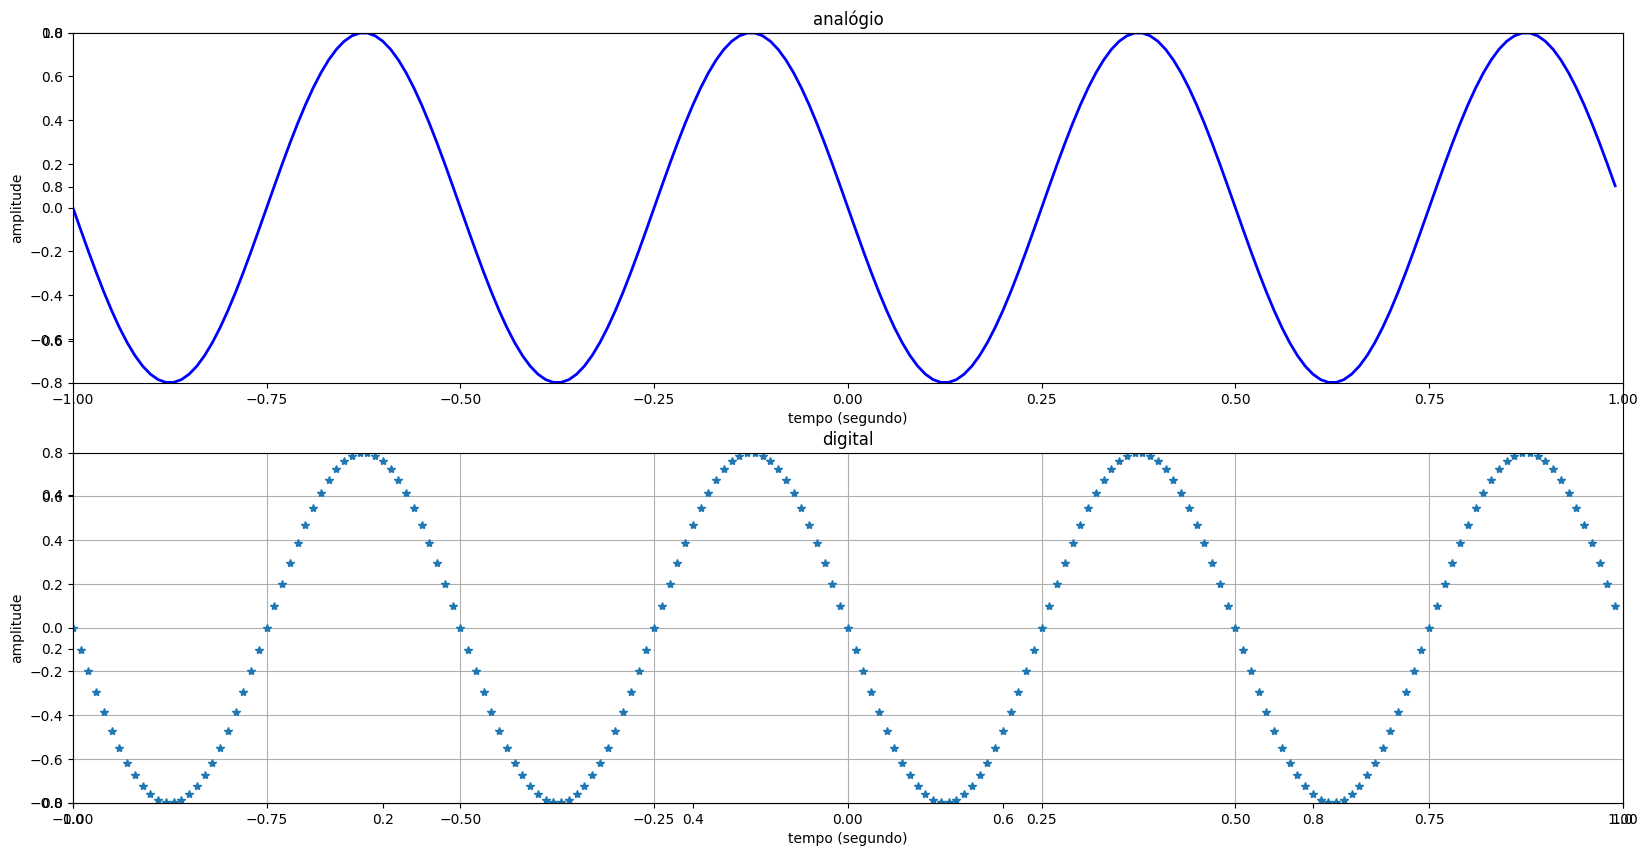

In [3]:
plt.subplots(figsize=(20, 10))

ax1=plt.subplot(2, 1, 1)
ax1.plot(t, x, 'b',lw=2)
plt.axis([-1,1,-0.8,0.8])
ax1.set_title('analógio')
ax1.set_xlabel('tempo (segundo)')
ax1.set_ylabel('amplitude')

ax2=plt.subplot(212, sharex=ax1)
ax2.plot(t, x, '*', lw=2)
plt.axis([-1,1,-0.8,0.8])
plt.grid(True)
plt.title('digital')
plt.xlabel('tempo (segundo)')
plt.ylabel('amplitude')

## Primeira Intuição


|                |                                       |
| ---------------- | --------------------------------------- |
| **First Step** | ![primeiro passo](pictures/step.jpeg) |

<p></p>

> ### Algumas das propriedades do Audio Digital
>
> 1. Taxa de Amostragem (Sample Rate)
> 2. Volume
> 3. Tonalidade (Pitch)
> 4. Duração
<p></p>

----------

<p></p>

> 5. Quantidade de bits (Bit Depth)
> 6. Taxa de Bits (Bit Rate)
> 7. Armazenamento x estrutura de dados
> 8. Frame x Sample x Chunk Size


### Taxa de amostragem -  Sample Rate (sample frequency)

<p>Uma amostra ou sample é o estado original analógico da onda sonora em um certo periodo do tempo</p>
<p>Uma série de amostras conectadas descrevem um trecho de audio</p>

> Taxa de amostragem é o número de amostras por uma medida de tempo(normalmente em segundos), quando estamos captando um sinal continuo eanalógio para um sinal discreto e digital.

A `taxa de amostragem` também é chamada de:
  - Frequencia de amostragem(samplig rate)
  - Taxa de recuperação(recevery rate). 
  - Normalmente medido em HZ hertz. **41.200Hz**

In [4]:
amplitude = .8
frequencia = 440
fase_inicial = np.pi
duracao = 1

taxa_amostragem = 44100
tempo1 = np.arange(start=0, stop=duracao, step=duracao/taxa_amostragem, dtype=np.float32)
tempo2 = np.linspace(start=0, stop=duracao, num=duracao*taxa_amostragem, endpoint=False, dtype=np.float16)

x1 = amplitude * np.cos(2 * np.pi * frequencia * tempo1 + fase_inicial)
x2 = amplitude * np.cos(2 * np.pi * frequencia * tempo2 + fase_inicial)

print(len(tempo1))
print(len(tempo2))

44100
44100


Text(0, 0.5, 'amplitude')

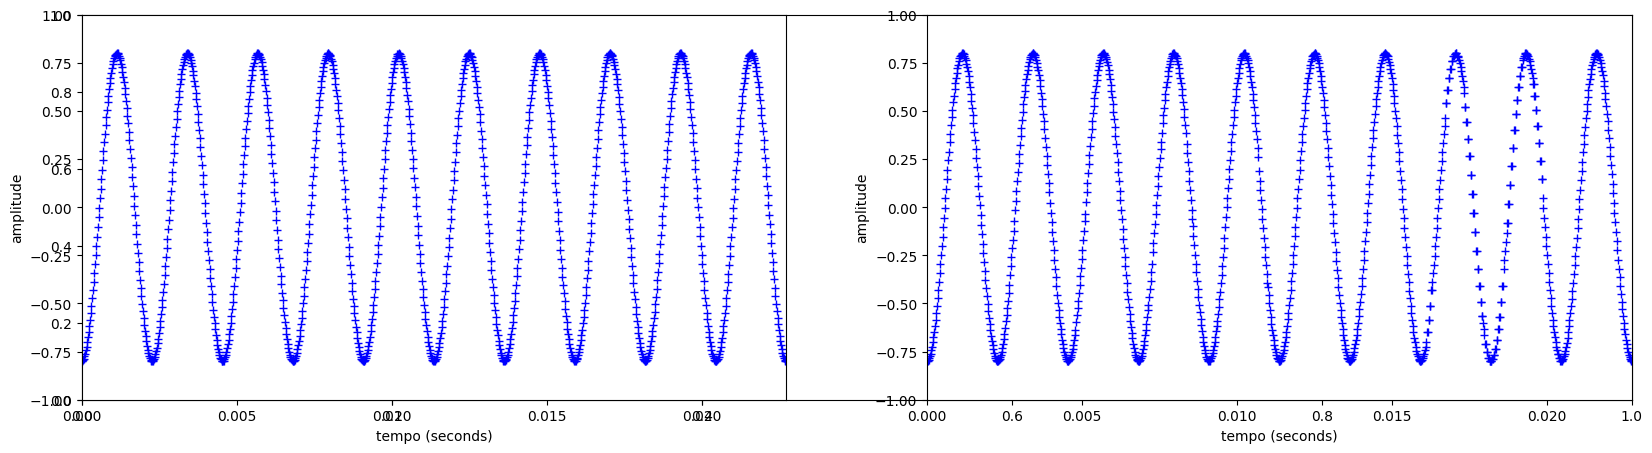

In [5]:
plt.subplots(figsize=(20, 5))
plt.subplot(1,2,1)
plt.plot(tempo1, x1, 'b+', linewidth=2)
plt.axis([-.0, 1/44, -1.0, 1.0])
plt.xlabel('tempo (seconds)')
plt.ylabel('amplitude')

plt.subplot(1,2,2)
plt.plot(tempo2, x2, 'b+', linewidth=2)
plt.axis([-.0, 1/44, -1.0, 1.0])
plt.xlabel('tempo (seconds)')
plt.ylabel('amplitude')


In [6]:
import IPython.display as ipd

ipd.display(ipd.Audio(data=x1, rate=taxa_amostragem))
ipd.display(ipd.Audio(data=x2, rate=taxa_amostragem))

In [7]:
def draw_wave(tempo, audio, style, duracao, zoom, amplitude):
    plt.plot(tempo, audio, style, linewidth=2)
    plt.axis([-.0, duracao/zoom, -amplitude, amplitude])
    plt.xlabel('tempo (seconds)')
    plt.ylabel('amplitude')

In [8]:
def create_audio(amplitude, frequencia, fase_inicial, duracao, taxa_amostragem):
    vetor_tempo = np.linspace(start=0, stop=duracao, num=duracao*taxa_amostragem, endpoint=False)
    two_phi = 2 * np.pi

    x = amplitude * np.cos( two_phi * frequencia * vetor_tempo + fase_inicial)
    return vetor_tempo, x

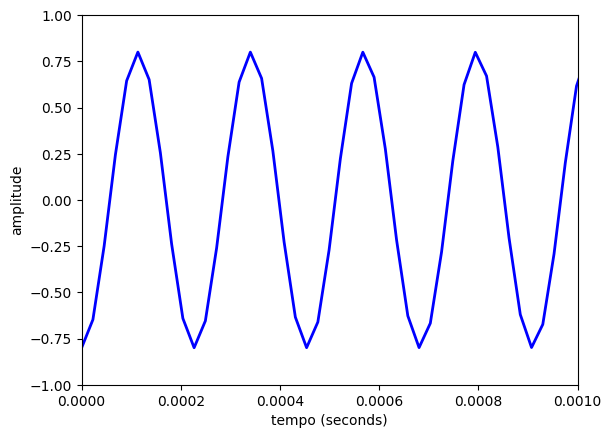

In [9]:
amplitude = .8
frequencia = 4400
fase_inicial = np.pi
duracao = 1
taxa_amostragem = 44100

tempo, audio = create_audio(amplitude, frequencia, fase_inicial, duracao, taxa_amostragem)
ipd.display(ipd.Audio(data=audio, rate=taxa_amostragem))
draw_wave(tempo, audio, 'b', duracao, 1000, amplitude+.2)

| Sample Rate | Mais usado em | OBS |
| ------------- | ------------- | ------------- |
| 8.000 Hz    | ligações telefonicas, walkie-talkie, e transmissões wireless |  |
| 11.025 Hz   | format PCM de menor qualidade, áudio MPEG e análise de subfaixas de subwoofer | Um quarto da taxa de amostragem de CDs de áudio |
| 16.000 Hz   | Extensão da frequência de banda larga sobre o padrão de 8.000 Hz para telefones Usado na maioria dos produtos modernos |  |
| 22.050 Hz   | usado para PCM de menor qualidade, áudio MPEG e análise em baixa frequência | Metade da taxa de amostragem de CDs de áudio |
| 32.000 Hz   | Usado em videocassetes digitais miniDV, fitas de vídeo com canais adicionais de áudio, DAT (modo LP), microfones sem fio digitais de alta qualidade |  |
| 44.056 Hz   | Usado por áudio digital sincronizado a sinais de vídeo coloridos NTSC |  |
| 44.100 Hz   | Padrão para CD de áudio, também amplamente usado com áudio MPEG-1 (VCD, SVCD, MP3) |  |
| 48.000 Hz   | Taxa padrão de amostragem de áudio usada em equipamentos de vídeo digital profissional, como gravadores de fita, servidores de vídeo e mesas de mixagem. | Frequência comum em equipamentos de áudio profissional |

[wiki Sampling](https://en.wikipedia.org/wiki/Sampling_(signal_processing)

#### **Volume**

É a amplitude de uma onda sonora, uma amplituda alta, produz sons mais altos, enquanto baixas amplitudos sons mais baixos.

#### **Tonalidade** - Pitch

É a frequencia das ondas sonoras, altas frequencias produzem valores mais altos, baixas frequências produzem valores mais baixos

In [10]:
def draw_subplot(data1, x1, data2, x2):
    plt.subplots(figsize=(20, 5))
    plt.subplot(1,2,1)
    plt.plot(data1, x1, 'b+', linewidth=2)
    plt.axis([-.0, 1/100, -1.0, 1.0])
    plt.xlabel('tempo (seconds)')
    plt.ylabel('amplitude')

    plt.subplot(1,2,2)
    plt.plot(data2, x2, 'b+', linewidth=2)
    plt.axis([-.0, 1/100, -1.0, 1.0])
    plt.xlabel('tempo (seconds)')
    plt.ylabel('amplitude')

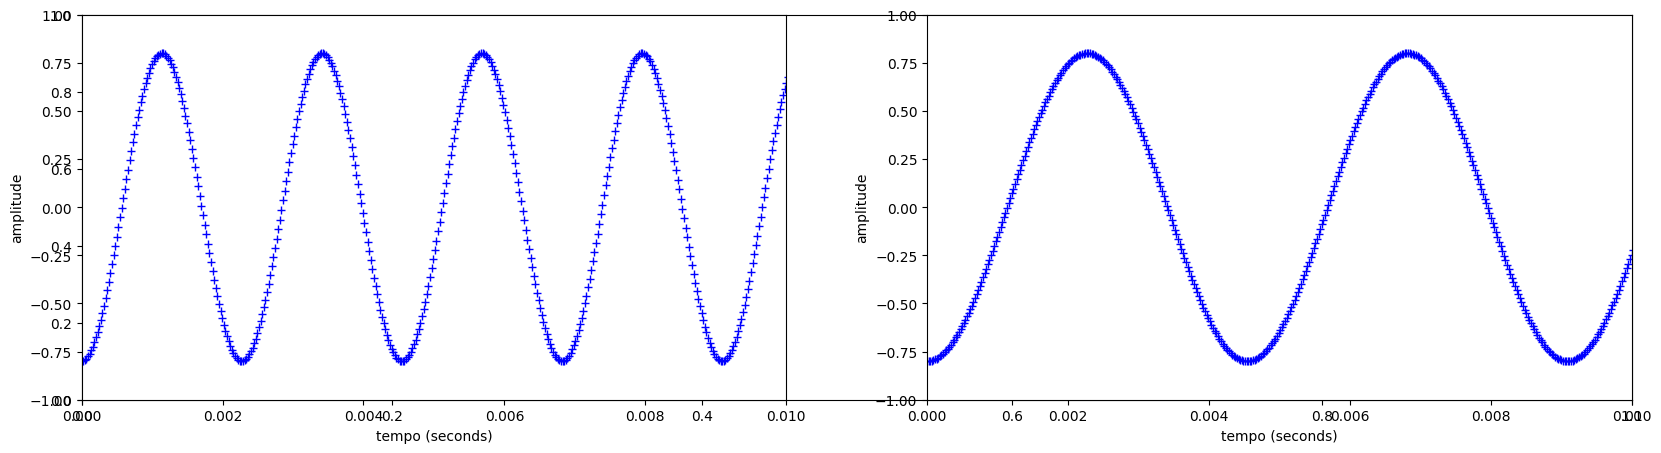

In [11]:
amplitude = .8
frequencia = 440
fase_inicial = np.pi
duracao = 1
taxa_amostragem = 44100

tempo1, audio1 = create_audio(amplitude, frequencia, fase_inicial, duracao, taxa_amostragem)
tempo2, audio2 = create_audio(amplitude, frequencia//2, fase_inicial, duracao, taxa_amostragem)

ipd.display(ipd.Audio(data=audio1, rate=taxa_amostragem))
ipd.display(ipd.Audio(data=audio2, rate=taxa_amostragem))
draw_subplot(tempo1, audio1, tempo2, audio2)

#### **Bit Depth** - Subchunk Size
  * Indica o número de bits usado para representar cada sample
  * Maiores valores de bit depth permitem uma representação maior da amplitude do audio
  * No pão nosso de cada dia significa as tipagens: int16, int24, int32, float16, float, double

<p> </p>

| Type | BIT Depth | # of possible values | min ~ max |
| ------ | ------ | ----------------------------------- | ------- |
| int/float | 32-bit | 4,294,967,296 | -2147483648 ~ +2147483647 |
| signed short/float16| 16-bit | 65,536 | -32768 ~ +32767 |
| char | 8-bit | 256 | 0 ~ 255 |

#### **Bit Rate**
É a quantidade de bits processados em uma unidade de tempo(segundos/minutos/horas)
Ele é o produto da taxa de amostragem, da profundidade de bits e do número de canais
normalmente representado em kbps ou Mbps

In [14]:
numero_canais = 1
milisegundos = 1000

bit_rate = (taxa_amostragem * 32 * numero_canais)/milisegundos
bit_rate

1411.2

#### **Duration**

É a duração total do arquivo em horas, minutos, segundos...

* Byte array for PCM data
* duration = (byte_lenght * bit_depth) / bit_rate

In [15]:
bit_len = len(tempo1)*32
(bit_len / bit_rate)

1000.0

In [20]:
bit_rate2 = (taxa_amostragem * 16 * numero_canais)/milisegundos

bit_len = len(tempo2)*16
(bit_len / bit_rate2)

1000.0

#### **Sample**
<p>A menor porção de um audio, ele representa parte uma onda em um ponto específico do tempo.</p>

> Frame é o conjunto de Samples por amostragem de tempo, normalemte usa valores entre 512 ou 1024 bits representa a estrutura em bytes, um chunk.
> Frame possui um sample de cada canal
    Frame Size = Sample * channels
    Frame Rate = Frames/second

  Se eu tenho 1 segundo de audio 44100hz mono, significa que eu tenho um frame 44100 samples
  Se eu tenho 1 segundo de audio 44100hz stereo, significa que eu tenho 88200 samples, mas o meu frame size ainda é 44100
  frame = 44100
  sample-rate = 88200
  https://developer.mozilla.org/en-US/docs/Web/API/Web_Audio_API/Basic_concepts_behind_Web_Audio_API

  Chunk-size - ou buffer.
  São os dados que enviamos para a placa de audio. Normalmente os valores 512 e 1024 são escolhidos.

  Um valor menor resulta em menos latência entre as operações, mas se for muito pequeno teremos problemas
  com a taxa de transferência de áudio e o tamanho do barramento do dispositivo de áudio.
  É importante definir um fps, ou quantas vezes por segundo o som será reproduzido.

#### **Canais e trilhas de audio**
Como os canais são representados de forma sequencial no array

Basicamente vamos falar sobre mono e stereo.
O som mono tem um canal de audio, e o stereo tem dois, esquerda e direita.
Para um som de um segundo a 44100Hz:

* Um som mono vai ter 44100 frames( cada chunk-size de 1024 samples ) 44100/1024 = 43 fps
* Um som stereo vai ter 44100 frames( cada chunk-size de 2048 samples ) 88200/2048 = 43 fps